<a href="https://colab.research.google.com/github/nawroz-m/ML_learning/blob/main/food_101_CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the dataset from https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

In [1]:
# source: https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2025-10-20 11:57:30--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2025-10-20 11:57:30--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  21.1MB/s    in 3m 47s  

2025-10-20 12:01:18 (21.0 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



# Since the imported file is in tar let's extract it

In [2]:
import tarfile
zip_dir = tarfile.open('food-101.tar.gz')
zip_dir.extractall()
zip_dir.close()

/tmp/ipython-input-4096493359.py:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  zip_dir.extractall()


In [3]:
# Check the number of filse and folders
import os
images_dir = 'food-101/images'
for dirpath, dirnames, filenames in os.walk(images_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath} ")

There are 101 directories and 0 files in food-101/images 
There are 0 directories and 1000 files in food-101/images/sashimi 
There are 0 directories and 1000 files in food-101/images/falafel 
There are 0 directories and 1000 files in food-101/images/fish_and_chips 
There are 0 directories and 1000 files in food-101/images/guacamole 
There are 0 directories and 1000 files in food-101/images/frozen_yogurt 
There are 0 directories and 1000 files in food-101/images/seaweed_salad 
There are 0 directories and 1000 files in food-101/images/filet_mignon 
There are 0 directories and 1000 files in food-101/images/pork_chop 
There are 0 directories and 1000 files in food-101/images/creme_brulee 
There are 0 directories and 1000 files in food-101/images/nachos 
There are 0 directories and 1000 files in food-101/images/sushi 
There are 0 directories and 1000 files in food-101/images/clam_chowder 
There are 0 directories and 1000 files in food-101/images/club_sandwich 
There are 0 directories and 10

In [ ]:
!ls food-101/images


apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

# Get ready the dataset to the train and test dataset

In [4]:
classes = os.listdir(images_dir)
len(classes), classes[:5]


(101, ['sashimi', 'falafel', 'fish_and_chips', 'guacamole', 'frozen_yogurt'])

# Get labels (in Json format)

In [5]:
import json
# get label
def get_labels(label_path):

  """
  Accept a label path in the form of a JSON and return the file as a python objec.
  """
  with open(label_path) as f:
    return json.load(f)
train_labels = get_labels("food-101/meta/train.json")
test_labels = get_labels("food-101/meta/test.json")

In [6]:
# Should be 750 for training set and 250 for test set
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


In [ ]:
images_dir

'food-101/images'

In [7]:
# Create target class folder and move images there
import shutil

def copy_images(parent_folder, new_subset, dataset, target_labels):
  """
  Copies `labels[target_labels]` images from `parent_folder` to the `new_subset` named after `dataset` folder
  E.g. Move steak images to data/steack_subset/train & data/steack_subset/test

  Parameter
  ---------
  parent_folder(str) - original folder path with all data
  new_subset(str) - name of parent folder to copy to
  dataset(str) - which dataset?  train or test
  labels(list) - list of train or test labels
  target_labels(list) - list of target labels to copy e.g. ["steak", "pizza"]
  """
  # Get the aproperiet labels
  print(f"\n Using {dataset} labels...")
  labels = get_labels("food-101/meta/" + dataset + ".json")
  for i in target_labels:
    # Make target directory
    os.makedirs(parent_folder + "/" + new_subset + "/" + dataset + "/" + i,
                    exist_ok=True)
    # Go throug the labels and get the aproperiet classes
    image_move = [] # keep track of images moved
    for j in labels[i]:
      # Create original image path and new path
      og_path = images_dir + '/' + j + ".jpg"
      new_path = parent_folder + "/" + new_subset + "/" + dataset + "/" + j + ".jpg"
      # Copy image from old path to the new path
      shutil.copy2(og_path, new_path)
      image_move.append(new_path)
    print(f"Copied {len(image_move)} images from {dataset} dataset {i} class...")


# Split the whole dataset into training and testing

In [8]:
datasets = ['train', 'test']
parent_folder = "data"
new_subset = "food-101"

for i in datasets:
  copy_images(parent_folder= parent_folder,
              new_subset=new_subset,
              dataset=i,
              target_labels=classes)



 Using train labels...
Copied 750 images from train dataset sashimi class...
Copied 750 images from train dataset falafel class...
Copied 750 images from train dataset fish_and_chips class...
Copied 750 images from train dataset guacamole class...
Copied 750 images from train dataset frozen_yogurt class...
Copied 750 images from train dataset seaweed_salad class...
Copied 750 images from train dataset filet_mignon class...
Copied 750 images from train dataset pork_chop class...
Copied 750 images from train dataset creme_brulee class...
Copied 750 images from train dataset nachos class...
Copied 750 images from train dataset sushi class...
Copied 750 images from train dataset clam_chowder class...
Copied 750 images from train dataset club_sandwich class...
Copied 750 images from train dataset cannoli class...
Copied 750 images from train dataset gyoza class...
Copied 750 images from train dataset cheese_plate class...
Copied 750 images from train dataset chocolate_cake class...
Copied 

# plot a  random test images from each class

In [29]:
# set the test and train directory
test_dir = 'data/food-101/test'
train_dir = 'data/food-101/train'

import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

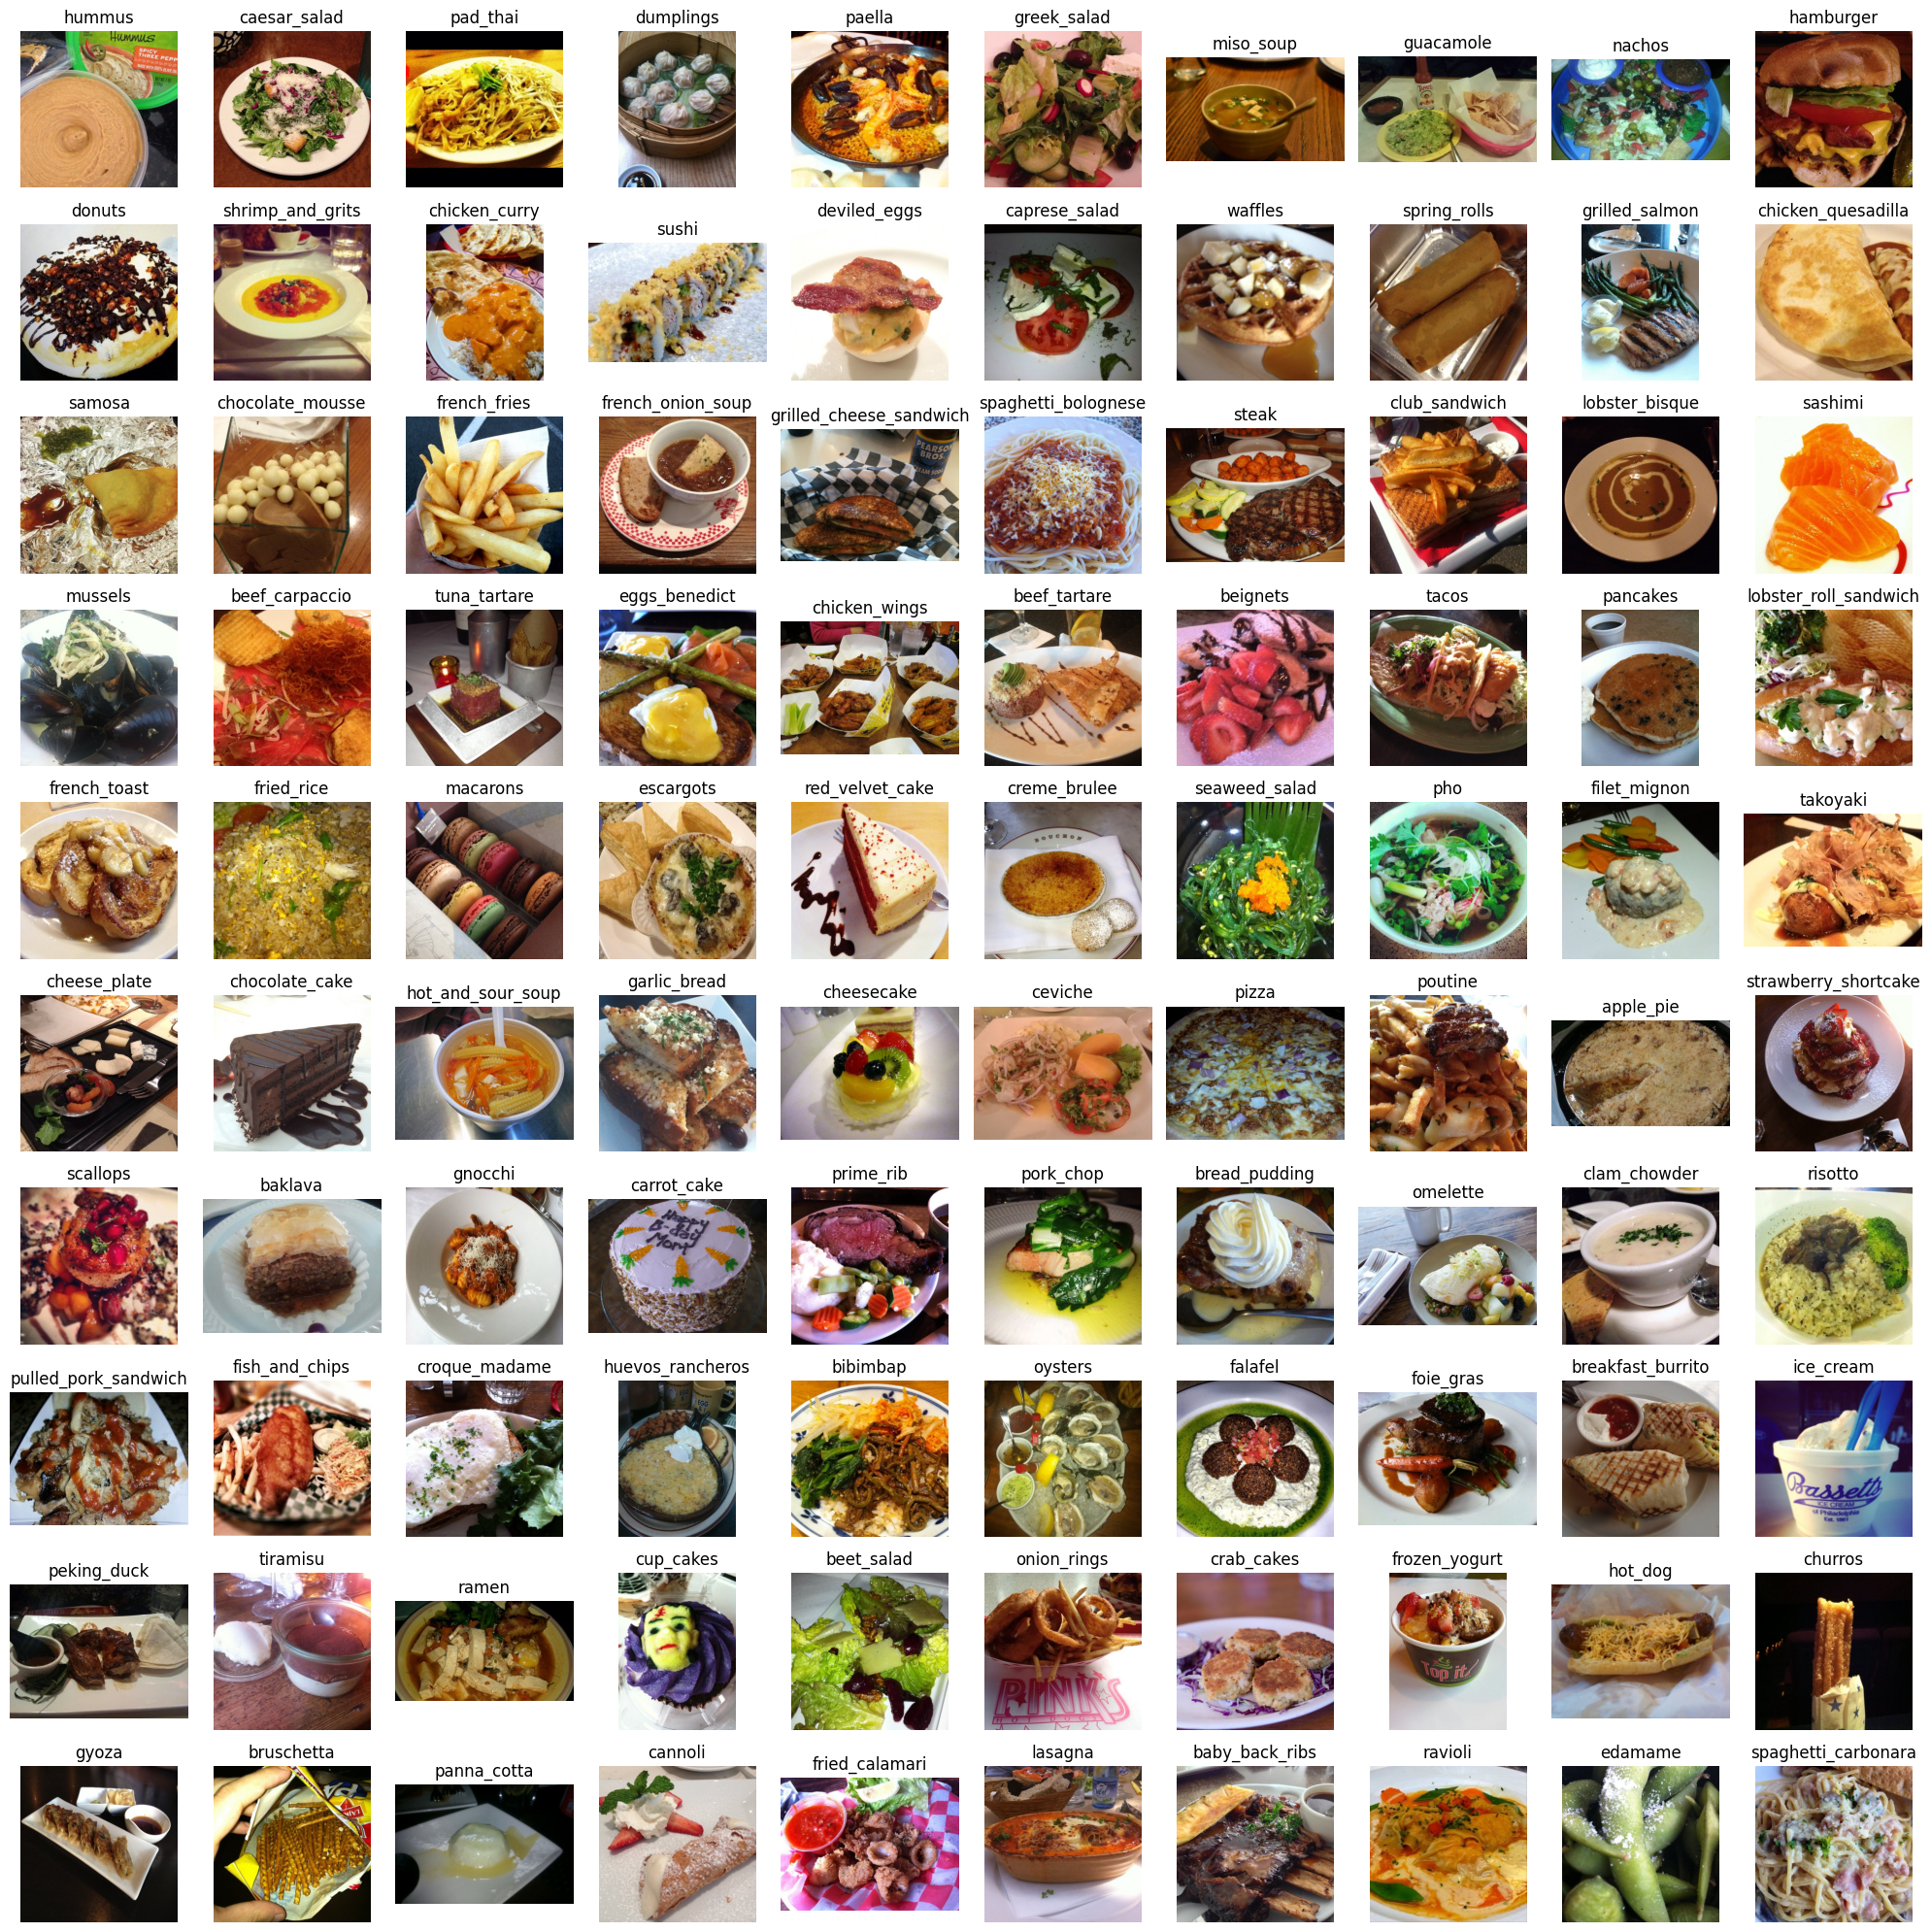

In [37]:
# Select how many random classes you want to show
num_classes_to_show = 100
selected_classes = random.sample(classes, num_classes_to_show)
# Create the plot
plt.figure(figsize=(20, 20))

for i, class_name in enumerate(selected_classes):
    # Get one random image from this class
    class_dir = os.path.join(test_dir, class_name)
    image_name = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, image_name)

    # Read and plot image
    img = mpimg.imread(image_path)
    plt.subplot(10, 10, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()